In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datasnaek/league-of-legends")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'league-of-legends' dataset.
Path to dataset files: /kaggle/input/league-of-legends


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the dataset
path="/kaggle/input/league-of-legends/games.csv"
df=pd.read_csv(path)
df

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


The above dataset is 51490 rows with around 60 features(independent features) and 'winner' - which is the dependent variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

The **irrelevant features** that may cause overfitting are systematically removed at the beginning itself.

In [5]:
df.drop(columns=['gameId','seasonId','creationTime','t1_ban1','t2_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5','t2_ban2','t2_ban3','t2_ban4','t2_ban5','t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2','t1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ2_sum1','t2_champ2_sum2','t2_champ1_sum1','t2_champ1_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2','t2_champ5_sum1','t2_champ5_sum2','t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id'], axis=1, inplace=True)


here is the basic statistical analysis of the consolidated dataset.

In [6]:
df.describe()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,1832.362808,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,0.731676,5.699359,1.017537,0.372286,1.387182,0.251466,5.549466,0.985084,0.414547,1.404370,0.240105
std,512.017696,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,0.822526,3.799808,1.263934,0.583934,1.206818,0.433860,3.860989,1.256284,0.613768,1.224492,0.427151
min,190.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1531.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1833.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,2148.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000


In [7]:
df.drop_duplicates()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1949,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1851,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1493,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1758,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,2094,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,2,1,2,2,0,2,0,2,0,0,0,0,10,2,0,4,0
51486,3304,2,1,1,2,2,2,2,5,4,0,2,0,11,7,4,4,1
51487,2156,2,2,2,2,0,1,0,0,0,0,1,0,10,2,0,2,0
51488,1475,2,2,2,2,0,2,0,0,0,0,0,0,11,3,0,1,0


In [8]:
display(df.isnull().sum())

,0
gameDuration,0
winner,0
firstBlood,0
firstTower,0
firstInhibitor,0
firstBaron,0
firstDragon,0
firstRiftHerald,0
t1_towerKills,0
t1_inhibitorKills,0


The time duration of the game is very huge compared to other attributes in the dataset, so we must noramlise it using the MinMaxScalar.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df['gameDuration'] = scaler.fit_transform(df[['gameDuration']])

# display(df[['gameDuration']].head())

As seen below the dataset is reduced to **17 impactful features** that decide the outcome of the game.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        51490 non-null  int64
 1   winner              51490 non-null  int64
 2   firstBlood          51490 non-null  int64
 3   firstTower          51490 non-null  int64
 4   firstInhibitor      51490 non-null  int64
 5   firstBaron          51490 non-null  int64
 6   firstDragon         51490 non-null  int64
 7   firstRiftHerald     51490 non-null  int64
 8   t1_towerKills       51490 non-null  int64
 9   t1_inhibitorKills   51490 non-null  int64
 10  t1_baronKills       51490 non-null  int64
 11  t1_dragonKills      51490 non-null  int64
 12  t1_riftHeraldKills  51490 non-null  int64
 13  t2_towerKills       51490 non-null  int64
 14  t2_inhibitorKills   51490 non-null  int64
 15  t2_baronKills       51490 non-null  int64
 16  t2_dragonKills      51490 non-null  int6

# Visualisations

Univariate Analysis for ***categorical features***

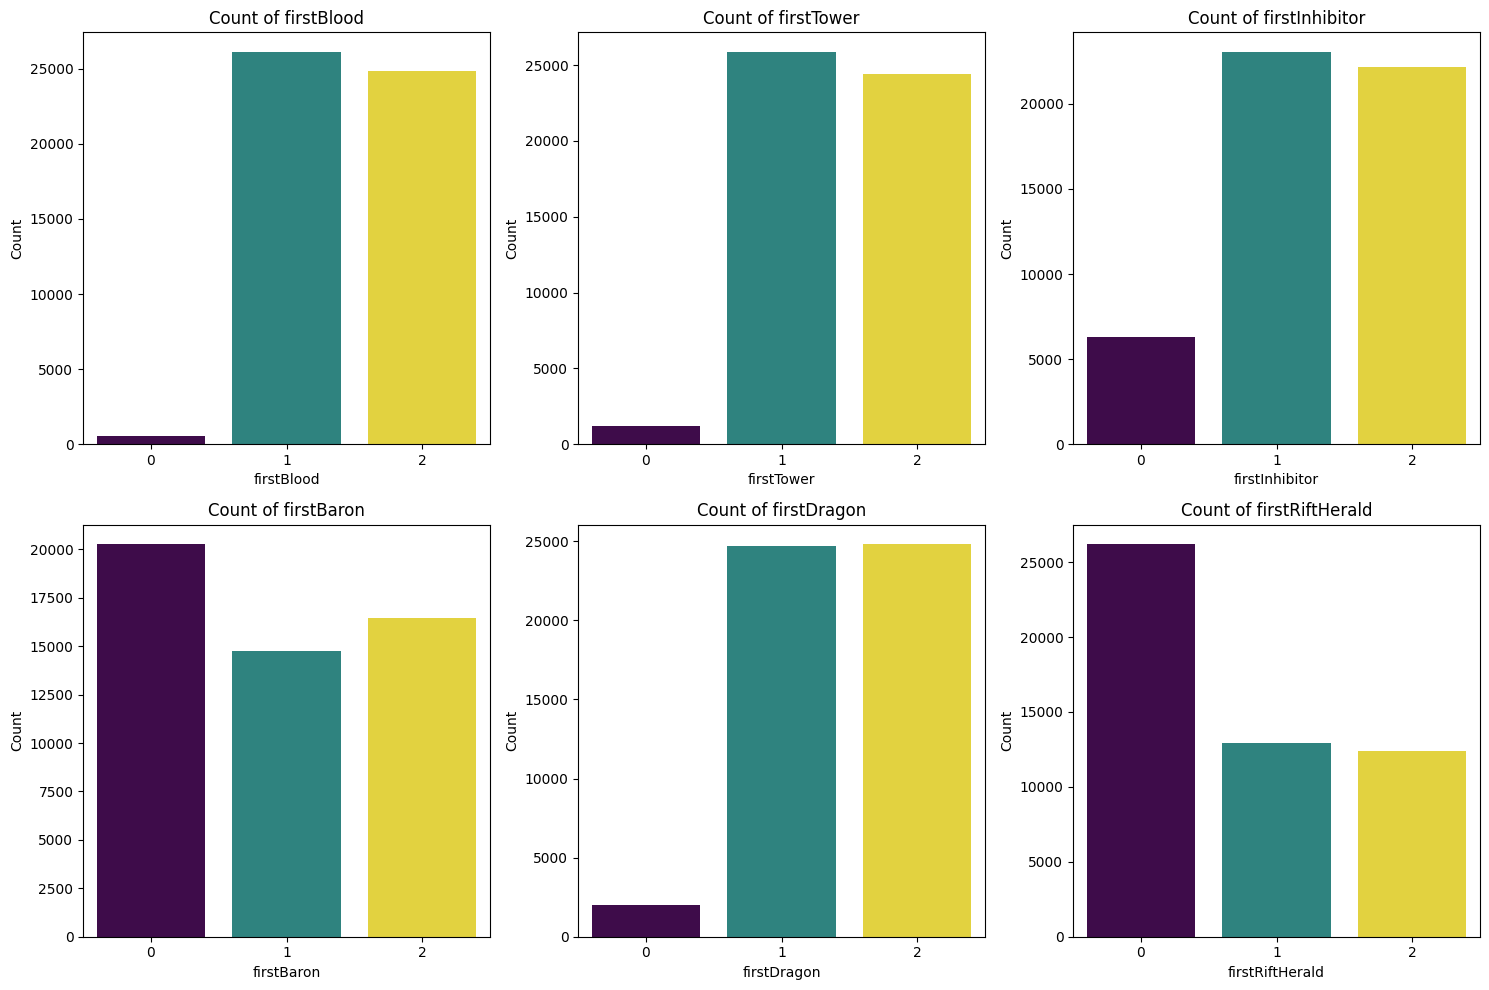

In [ ]:
first_event_columns = ['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(first_event_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', hue=col, legend=False)
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

From above bar  charts for label variables, we observe firstBaron and first riftherald are not much likely contested objectives. It is expected as Baron is somewhat lategame objective whereaas riftheraald is useful when team is behind than the enemy.

On the other hand, firstdragon, firstblood, firsttower and firstinhibitor are highly contested objectives. The reason is beacuse these are early game spikes that step up the leveling of champs.

Bivariate Analyis

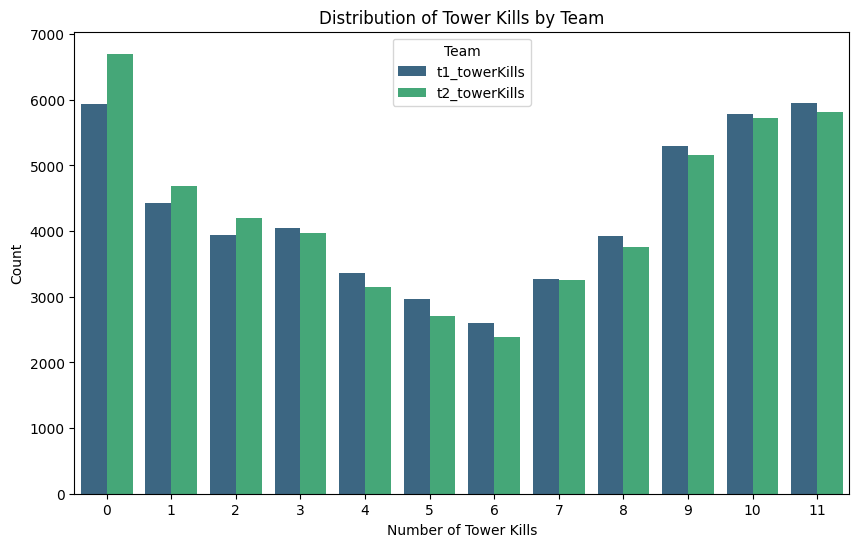

In [ ]:
tower_kills_melted = df[['t1_towerKills', 't2_towerKills']].melt(var_name='Team', value_name='Tower Kills')

plt.figure(figsize=(10, 6))
sns.countplot(x='Tower Kills', hue='Team', data=tower_kills_melted, palette='viridis')
plt.title('Distribution of Tower Kills by Team')
plt.xlabel('Number of Tower Kills')
plt.ylabel('Count')
plt.show()

Since its a competitive game, games are less likely to end when there are 5-6 towers down . At that stage , it is likely that team snowballs and win the other towers as well.

Or even 3 towerkills are sufficient to have a victory.So either least possible effort or total domination.

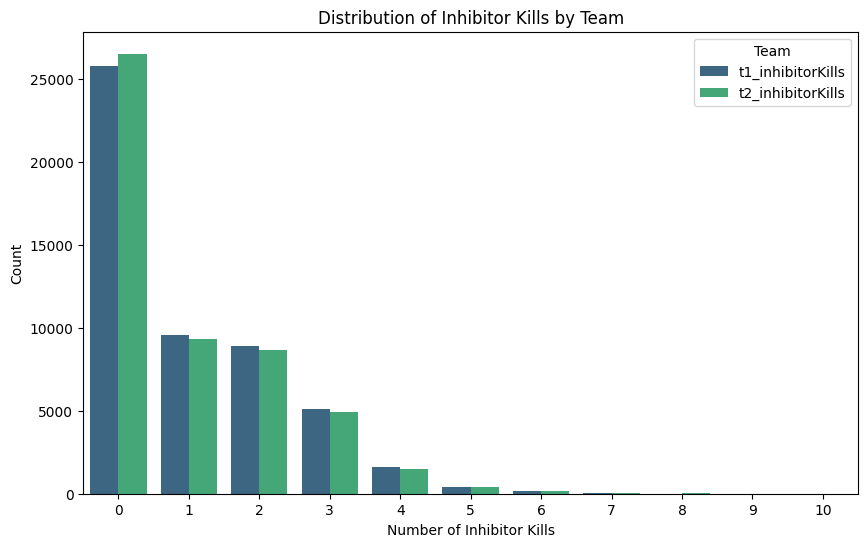

In [ ]:
inhibitor_kills_melted = df[['t1_inhibitorKills', 't2_inhibitorKills']].melt(var_name='Team', value_name='Inhibitor Kills')

plt.figure(figsize=(10, 6))
sns.countplot(x='Inhibitor Kills', hue='Team', data=inhibitor_kills_melted, palette='viridis')
plt.title('Distribution of Inhibitor Kills by Team')
plt.xlabel('Number of Inhibitor Kills')
plt.ylabel('Count')
plt.show()

Several games are ended when the opposite team knows that your team is way more powerful and there is no comeback possible , at that stage they surrender , in such case no inhibitor have fallen but game is still won. This graph confirms the such possibility.

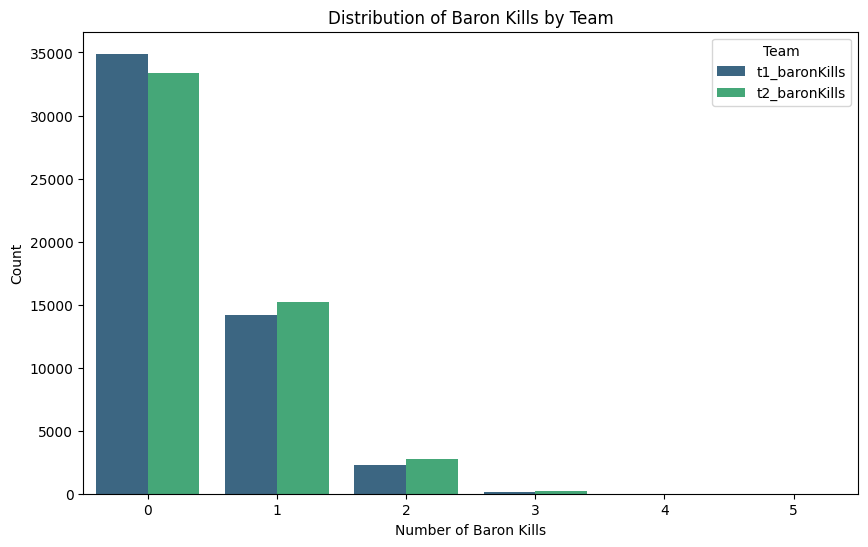

In [ ]:
baron_kills_melted = df[['t1_baronKills', 't2_baronKills']].melt(var_name='Team', value_name='Baron Kills')

plt.figure(figsize=(10, 6))
sns.countplot(x='Baron Kills', hue='Team', data=baron_kills_melted, palette='viridis')
plt.title('Distribution of Baron Kills by Team')
plt.xlabel('Number of Baron Kills')
plt.ylabel('Count')
plt.show()



Baron Nashor is infamous for its game-ending potential, so either it is unused or when its used game ends. But it is a great equiliser , so team2 is slighty more likely to get it.

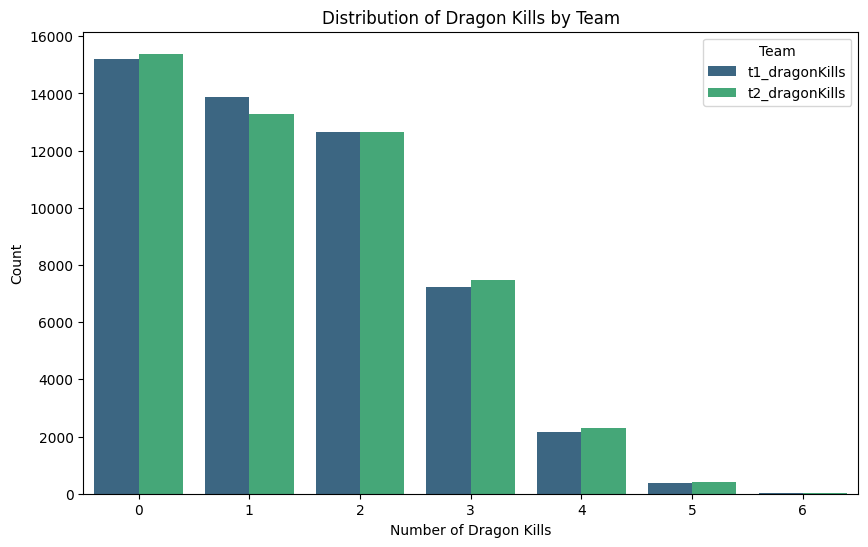

In [ ]:
dragon_kills_melted = df[['t1_dragonKills', 't2_dragonKills']].melt(var_name='Team', value_name='Dragon Kills')

plt.figure(figsize=(10, 6))
sns.countplot(x='Dragon Kills', hue='Team', data=dragon_kills_melted, palette='viridis')
plt.title('Distribution of Dragon Kills by Team')
plt.xlabel('Number of Dragon Kills')
plt.ylabel('Count')
plt.show()

By the time 2nd dragon is killed, Baron nashor spawns which has distinct game-ending potential so the 3rd dragon is not taken comparitively since game ends before that.

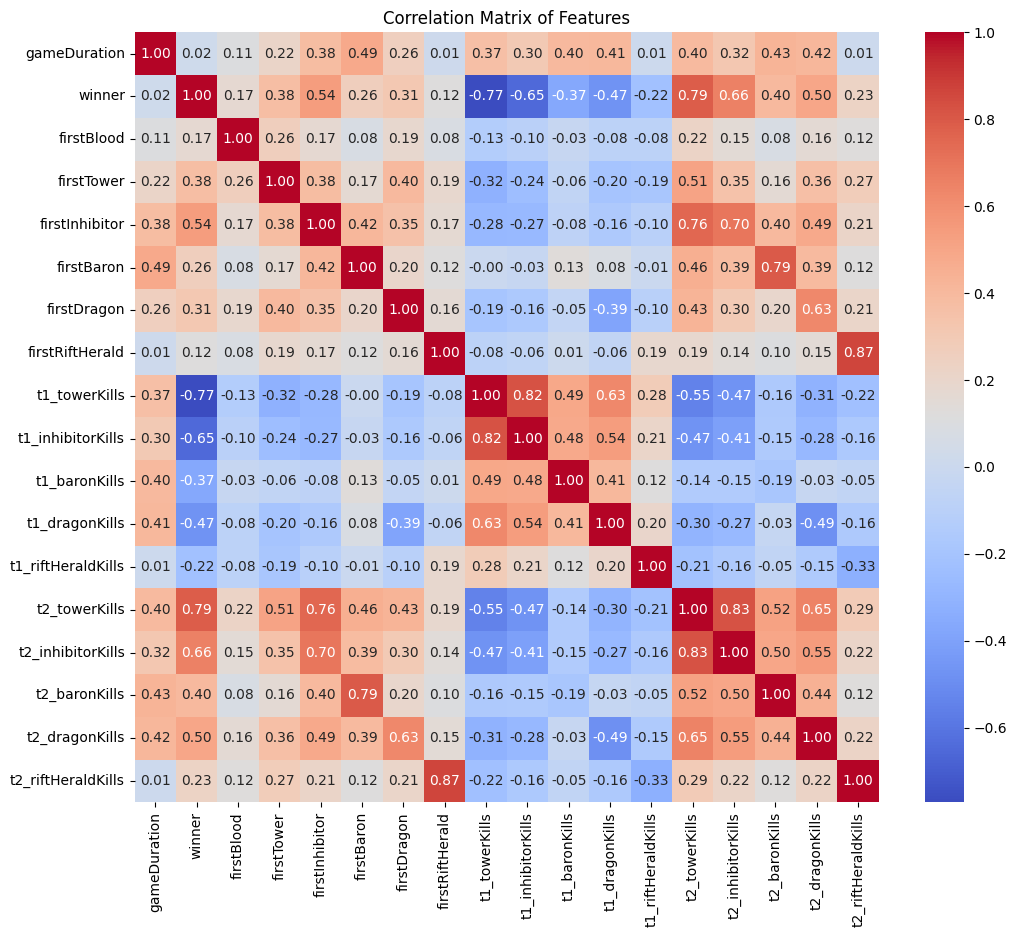

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Model Building and evaluation

Decision-Tree algorithm with hyperparameters Tuning using GridsearchCV

In [ ]:
# decison tree with grid search cv

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

choosing our dependent and Independent

In [12]:
y = df["winner"].values #what we want to predict
x = df.drop(["winner"],axis=1) # all the independent parameters

Splitting into training and test data which shall be used to train other models as well

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=21)

In [ ]:
x_test.shape

(12873, 17)

In [ ]:
x_train.shape

(38617, 17)

Grid Search- for HyperParameters Tuning

In [ ]:
criterion=["gini","entropy"]
max_depth=range(1,20,2)
splitter=["best","random"]
dt=DecisionTreeClassifier()
grid_decision_tree=GridSearchCV(estimator=dt,cv=15,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

In [ ]:
grid_decision_tree.fit(x_train,y_train)
print("best score: ", grid_decision_tree.best_score_)
print("best param: ", grid_decision_tree.best_params_)

best score:  0.9682262203815601
best param:  {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}


In [ ]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=7, splitter="best")
dt2.fit(x_train,y_train)
print("score:", dt2.score(x_test,y_test))

score: 0.9670628447137419


check if overfitting??

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = dt2.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Error: {1 - train_accuracy:.4f}")

Training Accuracy: 0.9708
Training Error: 0.0292


In [ ]:
from sklearn.metrics import accuracy_score

y_test_pred = dt2.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error: {1 - test_accuracy:.4f}")

Test Accuracy: 0.9671
Test Error: 0.0329


since the training error is very close to testing error , the model is not overfitting.

High Interpretability: Building the decision tree to gain ***win-condition insights***.

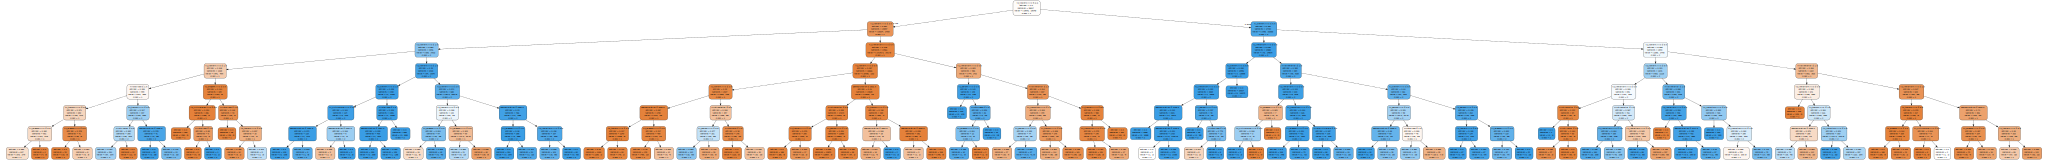

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=x.columns,class_names=["1","2"],filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Evaulation of the model:**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
predicted_values = dt2.predict(x_test)
cm=confusion_matrix(y_test,predicted_values)
cr=classification_report(y_test,predicted_values)
print('Classification report : \n',cr)

Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.97      0.97      6535
           2       0.97      0.96      0.97      6338

    accuracy                           0.97     12873
   macro avg       0.97      0.97      0.97     12873
weighted avg       0.97      0.97      0.97     12873



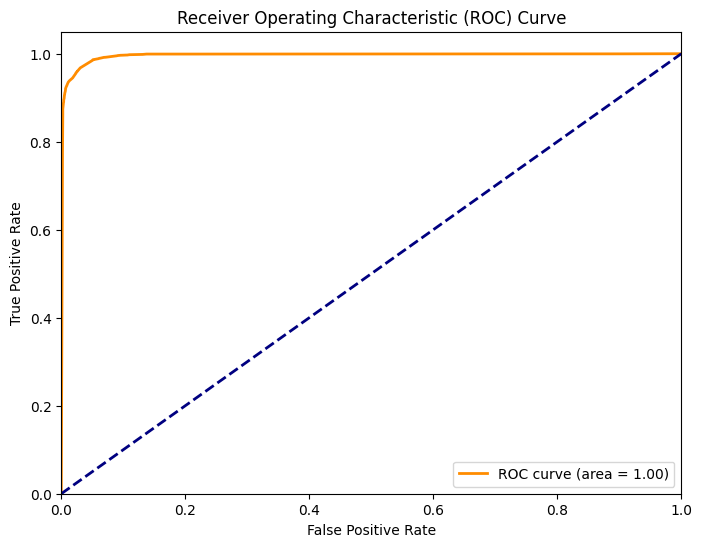

AUC: 1.00


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 2)
y_pred_proba = dt2.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=2)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.2f}")

Text(0.5, 23.52222222222222, 'y_head')

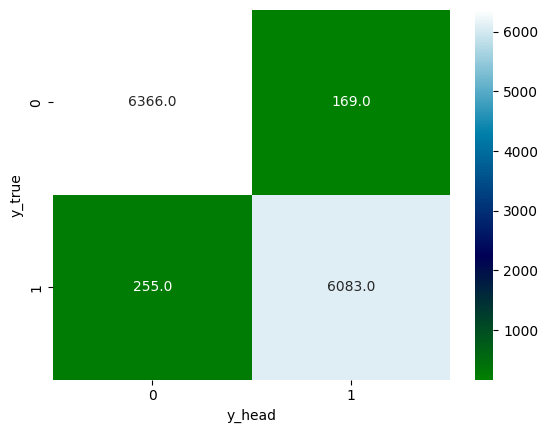

In [ ]:
g1 = sns.heatmap(cm,annot=True,fmt=".1f",cmap="ocean",cbar=True)
g1.set_ylabel('y_true')
g1.set_xlabel('y_head')

In [ ]:
#test for real scene

In [ ]:
scenario={"feature":['gameDuration',  'firstBlood',  'firstTower',  'firstInhibitor',  'firstBaron',  'firstDragon',  'firstRiftHerald',  't1_towerKills',  't1_inhibitorKills',  't1_baronKills',  't1_dragonKills',  't1_riftHeraldKills',  't2_towerKills',  't2_inhibitorKills',  't2_baronKills',  't2_dragonKills',  't2_riftHeraldKills'],
         "value":[1949,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1]}
scen=pd.DataFrame(scenario)
scen.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
feature,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
value,1949,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1


In [ ]:
x1=[[1851,1,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1]]
c=dt2.predict_proba(x1)
print("winner is :" , dt2.predict(x1) )
print("first team win probability is %.2f%%" % (c[0][0]*100))
print("second team win probability is %.2f%%" % (c[0][1]*100))

winner is : [1]
first team win probability is 99.98%
second team win probability is 0.02%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# **RANDOM FOREST**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")

# Display classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.9707
Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      6535
           2       0.97      0.97      0.97      6338

    accuracy                           0.97     12873
   macro avg       0.97      0.97      0.97     12873
weighted avg       0.97      0.97      0.97     12873



In [15]:
from sklearn.metrics import accuracy_score

y_train_pred_rf = rf_model.predict(x_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Training Error: {1 - train_accuracy_rf:.4f}")

Random Forest Training Accuracy: 0.9917
Random Forest Training Error: 0.0083


In [16]:
from sklearn.metrics import accuracy_score

y_test_pred_rf = rf_model.predict(x_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")
print(f"Random Forest Test Error: {1 - test_accuracy_rf:.4f}")

Random Forest Test Accuracy: 0.9707
Random Forest Test Error: 0.0293


In [ ]:
import pickle

# Save the trained Random Forest model to a file
filename_rf = 'random_forest_model.pkl'
pickle.dump(rf_model, open(filename_rf, 'wb'))

print(f"Random Forest model saved to {filename_rf}")

Random Forest model saved to random_forest_model.pkl


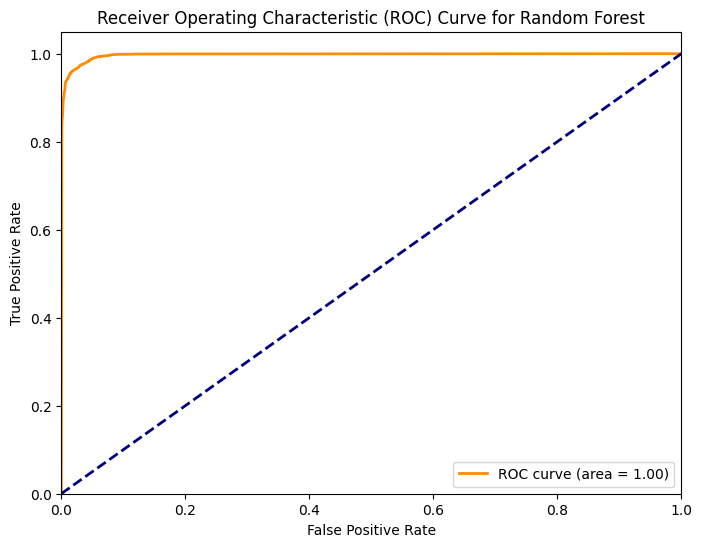

Random Forest AUC: 0.9970


In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 2)
y_pred_proba_rf = rf_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf, pos_label=2)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

print(f"Random Forest AUC: {roc_auc_rf:.4f}")

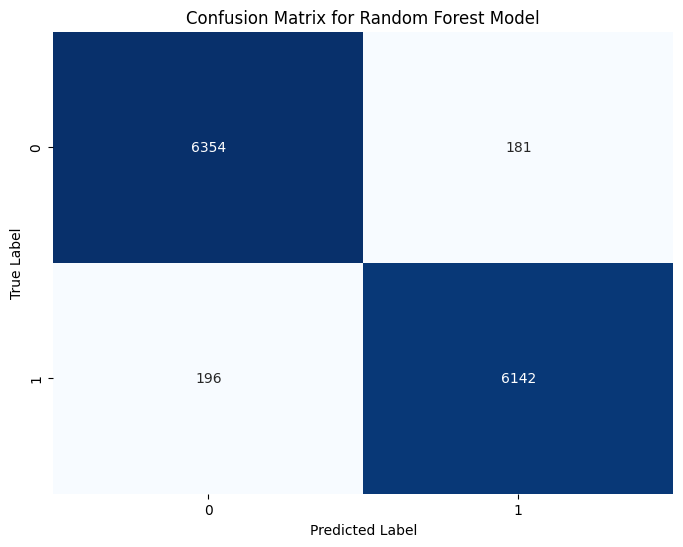

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the Logistic Regression model
lr_model = LogisticRegression(random_state=21, solver='liblinear')

# Train the model
lr_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(x_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Model Accuracy: {accuracy_lr:.4f}")

# Display classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Model Accuracy: 0.9608
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      6535
           2       0.96      0.96      0.96      6338

    accuracy                           0.96     12873
   macro avg       0.96      0.96      0.96     12873
weighted avg       0.96      0.96      0.96     12873



In [21]:
y_train_pred_lr = lr_model.predict(x_train)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)

print(f"Logistic Regression Training Accuracy: {train_accuracy_lr:.4f}")
print(f"Logistic Regression Training Error: {1 - train_accuracy_lr:.4f}")

y_test_pred_lr = lr_model.predict(x_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print(f"Logistic Regression Test Accuracy: {test_accuracy_lr:.4f}")
print(f"Logistic Regression Test Error: {1 - test_accuracy_lr:.4f}")

Logistic Regression Training Accuracy: 0.9621
Logistic Regression Training Error: 0.0379
Logistic Regression Test Accuracy: 0.9608
Logistic Regression Test Error: 0.0392


In [22]:
from sklearn.metrics import log_loss

y_pred_proba_lr = lr_model.predict_proba(x_test)
logloss_lr = log_loss(y_test, y_pred_proba_lr)

print(f"Logistic Regression Log Loss: {logloss_lr:.4f}")

Logistic Regression Log Loss: 0.0887


# LightBGM

In [34]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=21)

# Train the model
lgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(x_test)

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Model Accuracy: {accuracy_lgb:.4f}")

# Display classification report
print("Classification Report for LightGBM:")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 19075, number of negative: 19542
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 38617, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493953 -> initscore=-0.024187
[LightGBM] [Info] Start training from score -0.024187
LightGBM Model Accuracy: 0.9726
Classification Report for LightGBM:
              precision    recall  f1-score   support

           1       0.97      0.98      0.97      6535
           2       0.98      0.97      0.97      6338

    accuracy                           0.97     12873
   macro avg       0.97      0.97      0.97     12873
weighted avg       0.97      0.97      0.97     12873



In [36]:
from sklearn.metrics import log_loss

y_pred_proba_lgb = lgb_model.predict_proba(x_test)
logloss_lgb = log_loss(y_test, y_pred_proba_lgb)

print(f"LightGBM Log Loss: {logloss_lgb:.4f}")

LightGBM Log Loss: 0.0615


In [37]:
import pickle

# Save the trained LightGBM model to a file
filename_lgb = 'lightgbm_model.pkl'
pickle.dump(lgb_model, open(filename_lgb, 'wb'))

print(f"LightGBM model saved to {filename_lgb}")

LightGBM model saved to lightgbm_model.pkl


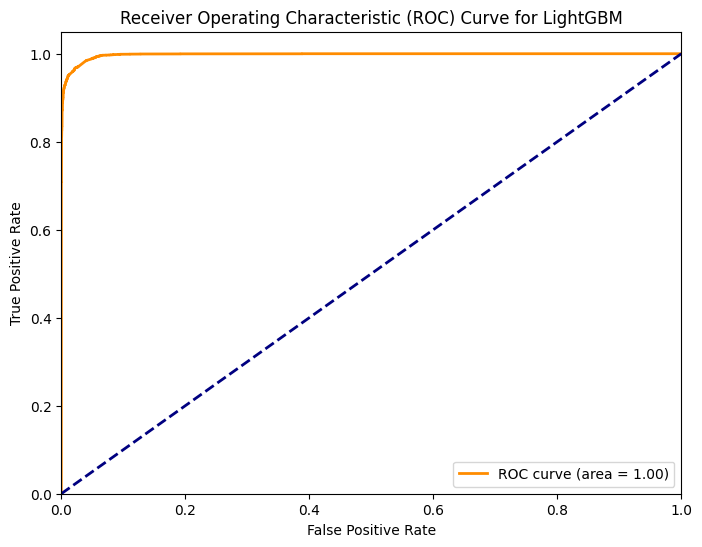

LightGBM AUC: 0.9977


In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 2)
y_pred_proba_lgb = lgb_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_pred_proba_lgb, pos_label=2)

# Calculate AUC
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM')
plt.legend(loc="lower right")
plt.show()

print(f"LightGBM AUC: {roc_auc_lgb:.4f}")

CatBoost

In [29]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [30]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the CatBoost model
# Using default parameters for a start
cat_model = CatBoostClassifier(random_state=21, verbose=0) # verbose=0 to reduce output

# Train the model
cat_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_cat = cat_model.predict(x_test)

# Evaluate the model
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Model Accuracy: {accuracy_cat:.4f}")

# Display classification report
print("Classification Report for CatBoost:")
print(classification_report(y_test, y_pred_cat))

CatBoost Model Accuracy: 0.9718
Classification Report for CatBoost:
              precision    recall  f1-score   support

           1       0.97      0.98      0.97      6535
           2       0.98      0.97      0.97      6338

    accuracy                           0.97     12873
   macro avg       0.97      0.97      0.97     12873
weighted avg       0.97      0.97      0.97     12873



In [32]:
y_train_pred_cat = cat_model.predict(x_train)
train_accuracy_cat = accuracy_score(y_train, y_train_pred_cat)

print(f"CatBoost Training Accuracy: {train_accuracy_cat:.4f}")
print(f"CatBoost Training Error: {1 - train_accuracy_cat:.4f}")

y_test_pred_cat = cat_model.predict(x_test)
test_accuracy_cat = accuracy_score(y_test, y_test_pred_cat)

print(f"CatBoost Test Accuracy: {test_accuracy_cat:.4f}")
print(f"CatBoost Test Error: {1 - test_accuracy_cat:.4f}")

CatBoost Training Accuracy: 0.9827
CatBoost Training Error: 0.0173
CatBoost Test Accuracy: 0.9718
CatBoost Test Error: 0.0282


In [31]:
from sklearn.metrics import log_loss

y_pred_proba_cat = cat_model.predict_proba(x_test)
logloss_cat = log_loss(y_test, y_pred_proba_cat)

print(f"CatBoost Log Loss: {logloss_cat:.4f}")

CatBoost Log Loss: 0.0612


In [38]:
import pickle

# Save the trained CatBoost model to a file
filename_cat = 'catboost_model.pkl'
pickle.dump(cat_model, open(filename_cat, 'wb'))

print(f"CatBoost model saved to {filename_cat}")

CatBoost model saved to catboost_model.pkl


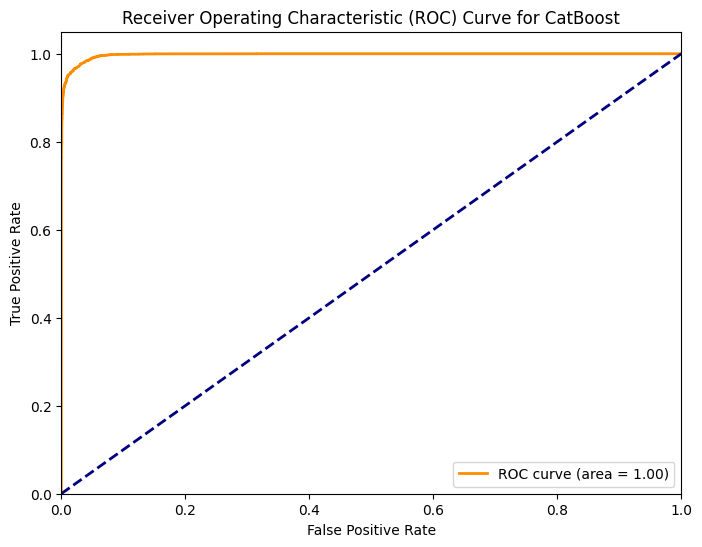

CatBoost AUC: 0.9977


In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 2)
y_pred_proba_cat = cat_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test, y_pred_proba_cat, pos_label=2)

# Calculate AUC
roc_auc_cat = auc(fpr_cat, tpr_cat)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cat, tpr_cat, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cat)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CatBoost')
plt.legend(loc="lower right")
plt.show()

print(f"CatBoost AUC: {roc_auc_cat:.4f}")